<a href="https://colab.research.google.com/github/rodrigopbbr/mineracao_de_dados/blob/main/Validacao_de_Classificacao_Titanic_cross_valid_stratificado_SVMeArvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo com o Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

In [ ]:
# import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123,
                                                    stratify=y)

In [ ]:
#import matplotlib.pyplot as plt
#plt.hist(titanic['survived'])

from collections import Counter
counter = Counter(y)
print(counter) 



Counter({0: 424, 1: 290})


#Classificador - Àrvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

#Acurácia da Árvore

In [ ]:
%%time 
#para computar o tempo

from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.81

 ---------------------------

Acurácia de Teste: 0.79
CPU times: user 3.26 ms, sys: 103 µs, total: 3.37 ms
Wall time: 4.33 ms


### Plotando a Árvore
Lembrando nossos features

* `X[0]` = `'pclass'`
* `X[1]` = `'female'`
* `X[2]` = `'age'`
* `X[3]` = `'fare'`

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.show()

#Matrix de Confusão da Árvore

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

print("Matrix de Confusão:")
titanic_cm = confusion_matrix( y_test_true, y_test_pred)
print(titanic_cm)

Acurácia de Teste: 0.79
Matrix de Confusão:
[[104   2]
 [ 35  38]]


#Heatmap da Matriz de Confusao da Árvore

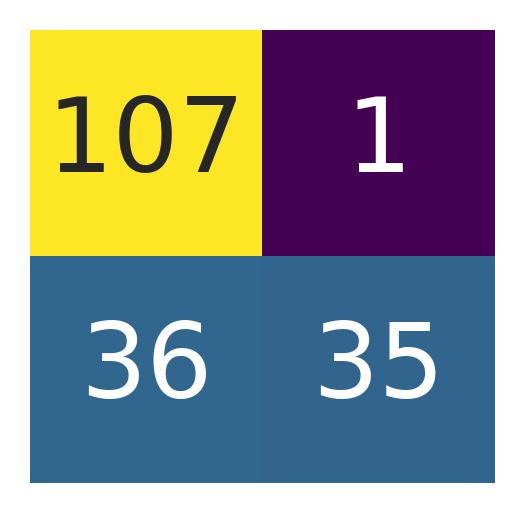

In [ ]:
cm_df =  titanic_cm 
# set the size of the figure
plt.figure(figsize = (2,2))
sns.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

##Matrix de Confusao da Árvore 
- Verdadeiros positivos, Verdadeiros Negativos, Falsos Positivos e  Falsos NEgativos
- Precisão e Recall

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_true , y_test_pred).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true negatives  (tn) =  107
Number of true positives  (tp) =  35
Number of false negatives (fn) =  36
Number of false positives (fp) =  1
Precision                                          = tp / (tp + fp) = 0.9722222222222222
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.49295774647887325
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.9907407407407407
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.009259259259259259
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.5070422535211268


##Matrix de Confusao do SVM 
- Verdadeiros positivos, Verdadeiros Negativos, Falsos Positivos e  Falsos NEgativos
- Precisão e Recall

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true negatives  (tn) =  99
Number of true positives  (tp) =  19
Number of false negatives (fn) =  9
Number of false positives (fp) =  52
Precision                                          = tp / (tp + fp) = 0.2676056338028169
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.6785714285714286
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.6556291390728477
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.3443708609271523
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.32142857142857145


#ROC da Árvore

AUC =  0.741849243609807


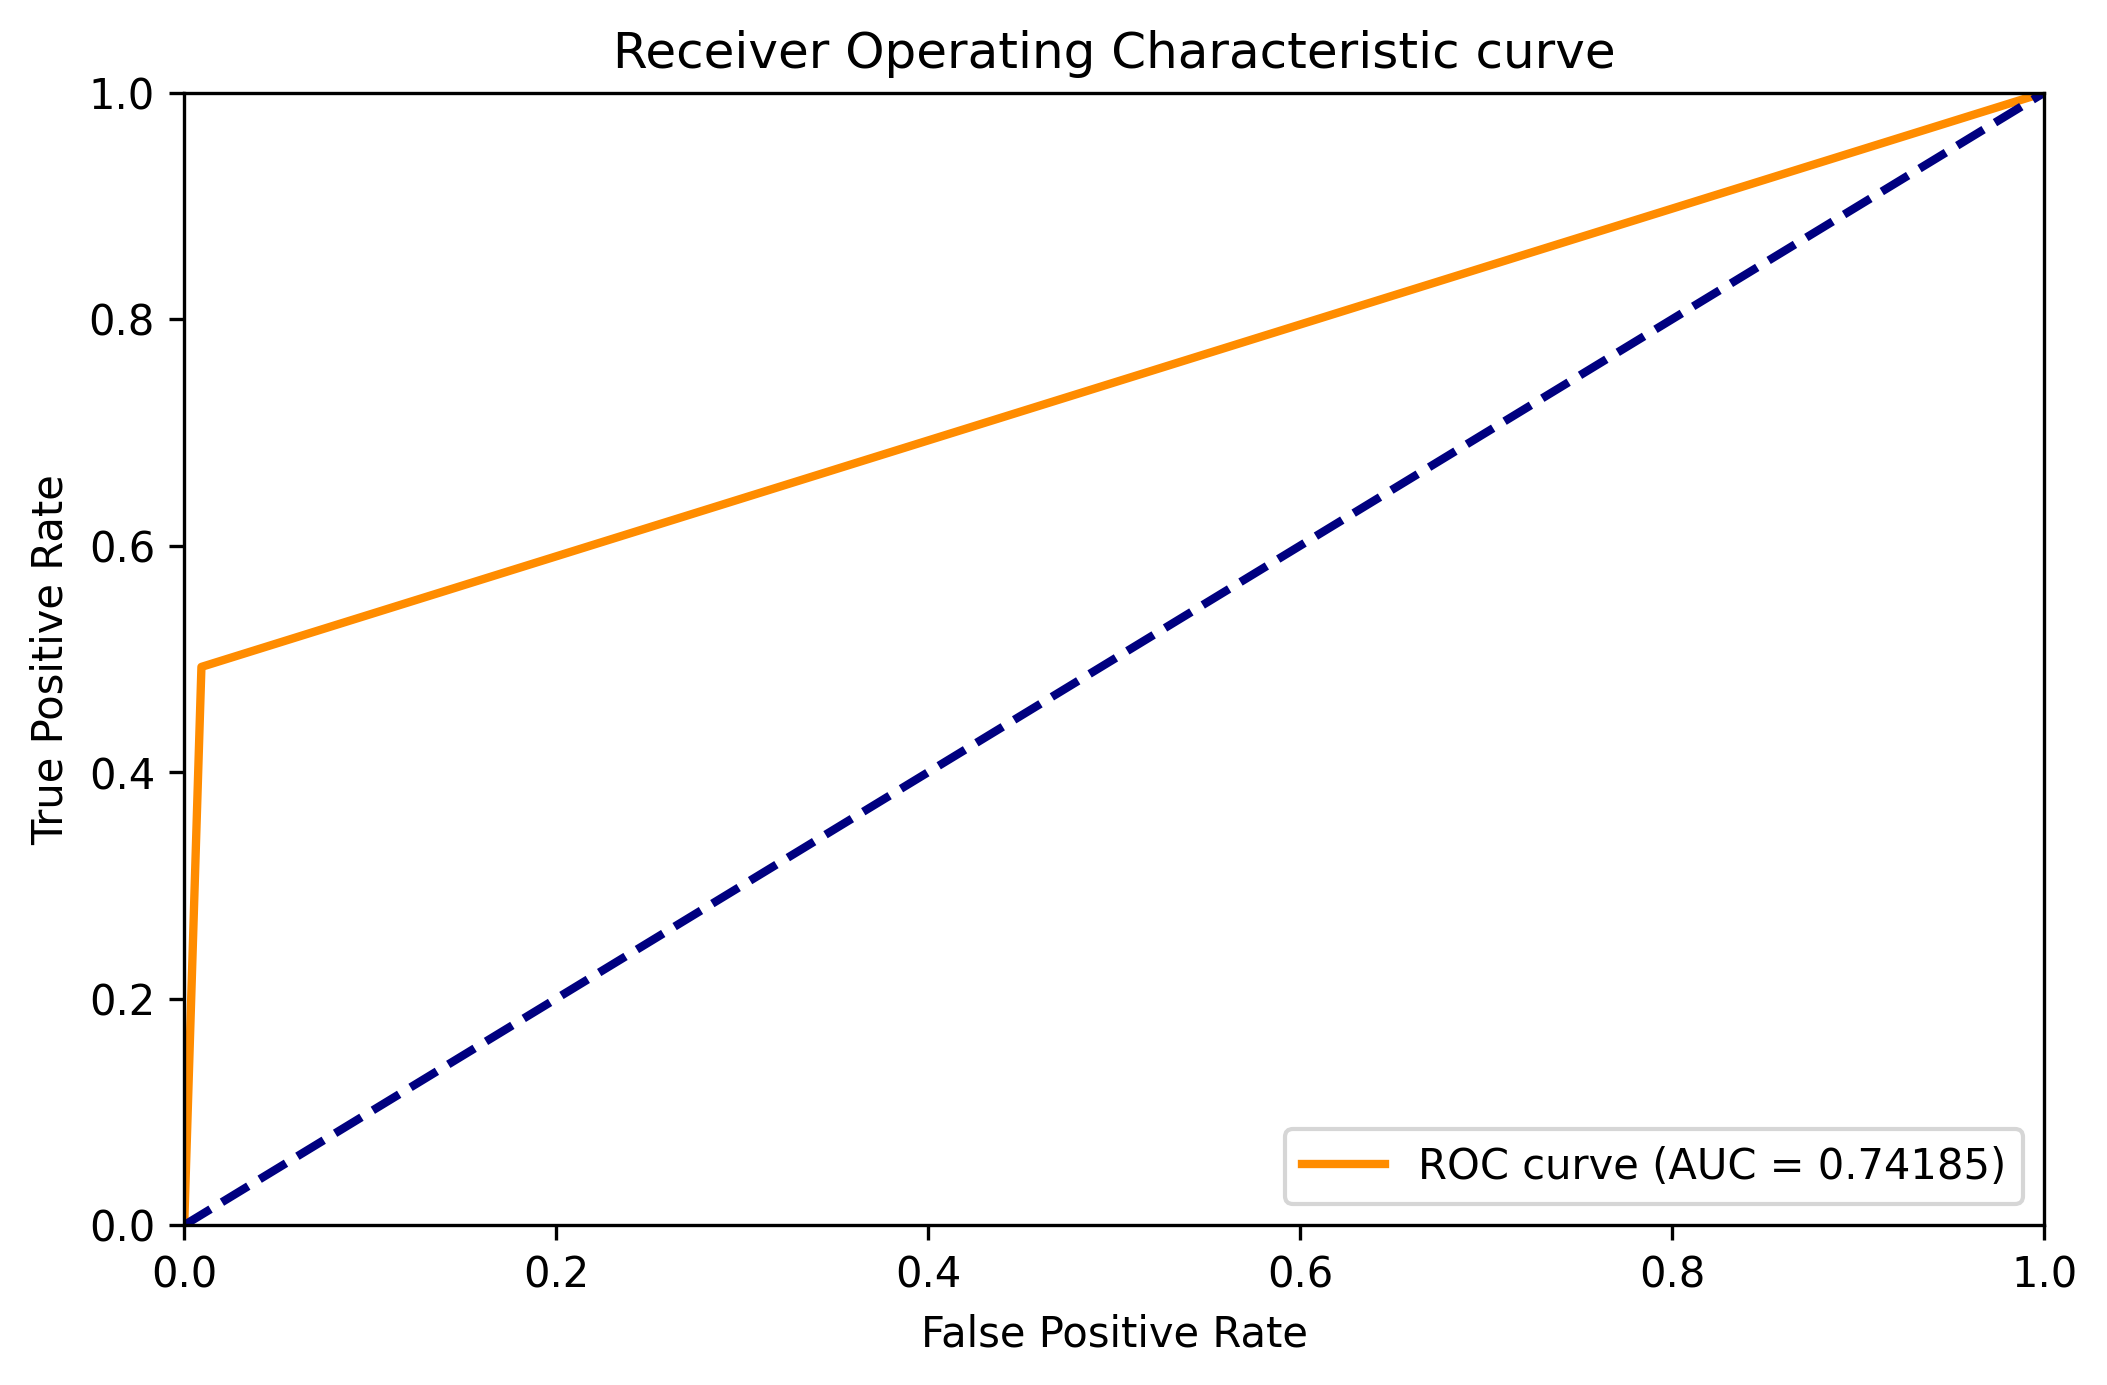

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve( y_test_true , y_test_pred) 

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score( y_test_true , y_test_pred )
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

# F1-Score da Árvore

In [ ]:
f1_score( y_test_true , y_test_pred )

0.6725663716814159

#Cross-validation da Árvore de Decisão


In [ ]:
from sklearn.model_selection import cross_val_score
 
clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)
cv_mean = cross_val_score(clf, X, y, cv=5,scoring='f1_macro')
print(cv_mean)
np.mean(cv_mean)

[0.70294973 0.78939617 0.79616228 0.71992403 0.77490942]


0.7566683265770295

# Cross Validation Stratified da Arvore

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)

for train_index, test_index in skf.split(X, y):
     X_train_strat, X_test_strat = X[train_index], X[test_index]
     y_train_strat, y_test_strat = y[train_index], y[test_index]


clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train_strat, y_train_strat)

from sklearn.metrics import accuracy_score

y_train_true_strat = y_train_strat
y_train_pred_strat = clf.predict(X_train_strat)
y_test_true_strat = y_test_strat
y_test_pred_strat = clf.predict(X_test_strat)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true_strat, y_train_pred_strat), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true_strat, y_test_pred_strat), 2)}")

 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
Acurácia de Treino: 0.79

 ---------------------------

Acurácia de Teste: 0.8


#F1 da Arvore Estratificada

In [ ]:
f1_score( y_test_true_strat , y_test_pred_strat )

0.6956521739130435

#Classificador SVM 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_svc)


62.01


#Matrix de Confusao do SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test, y_pred), 2)}")

print("Matrix de Confusão:")
titanic_svm_cm = confusion_matrix(y_test, y_pred)
print(titanic_svm_cm)

Acurácia de Teste: 0.62
Matrix de Confusão:
[[93 13]
 [55 18]]


#F1-Score do SVM

In [ ]:
f1_score( y_test, y_pred )

0.34615384615384615

#Precision x Recall no SVM

Text(0.5, 1.0, '2-class Precision-Recall curve:')

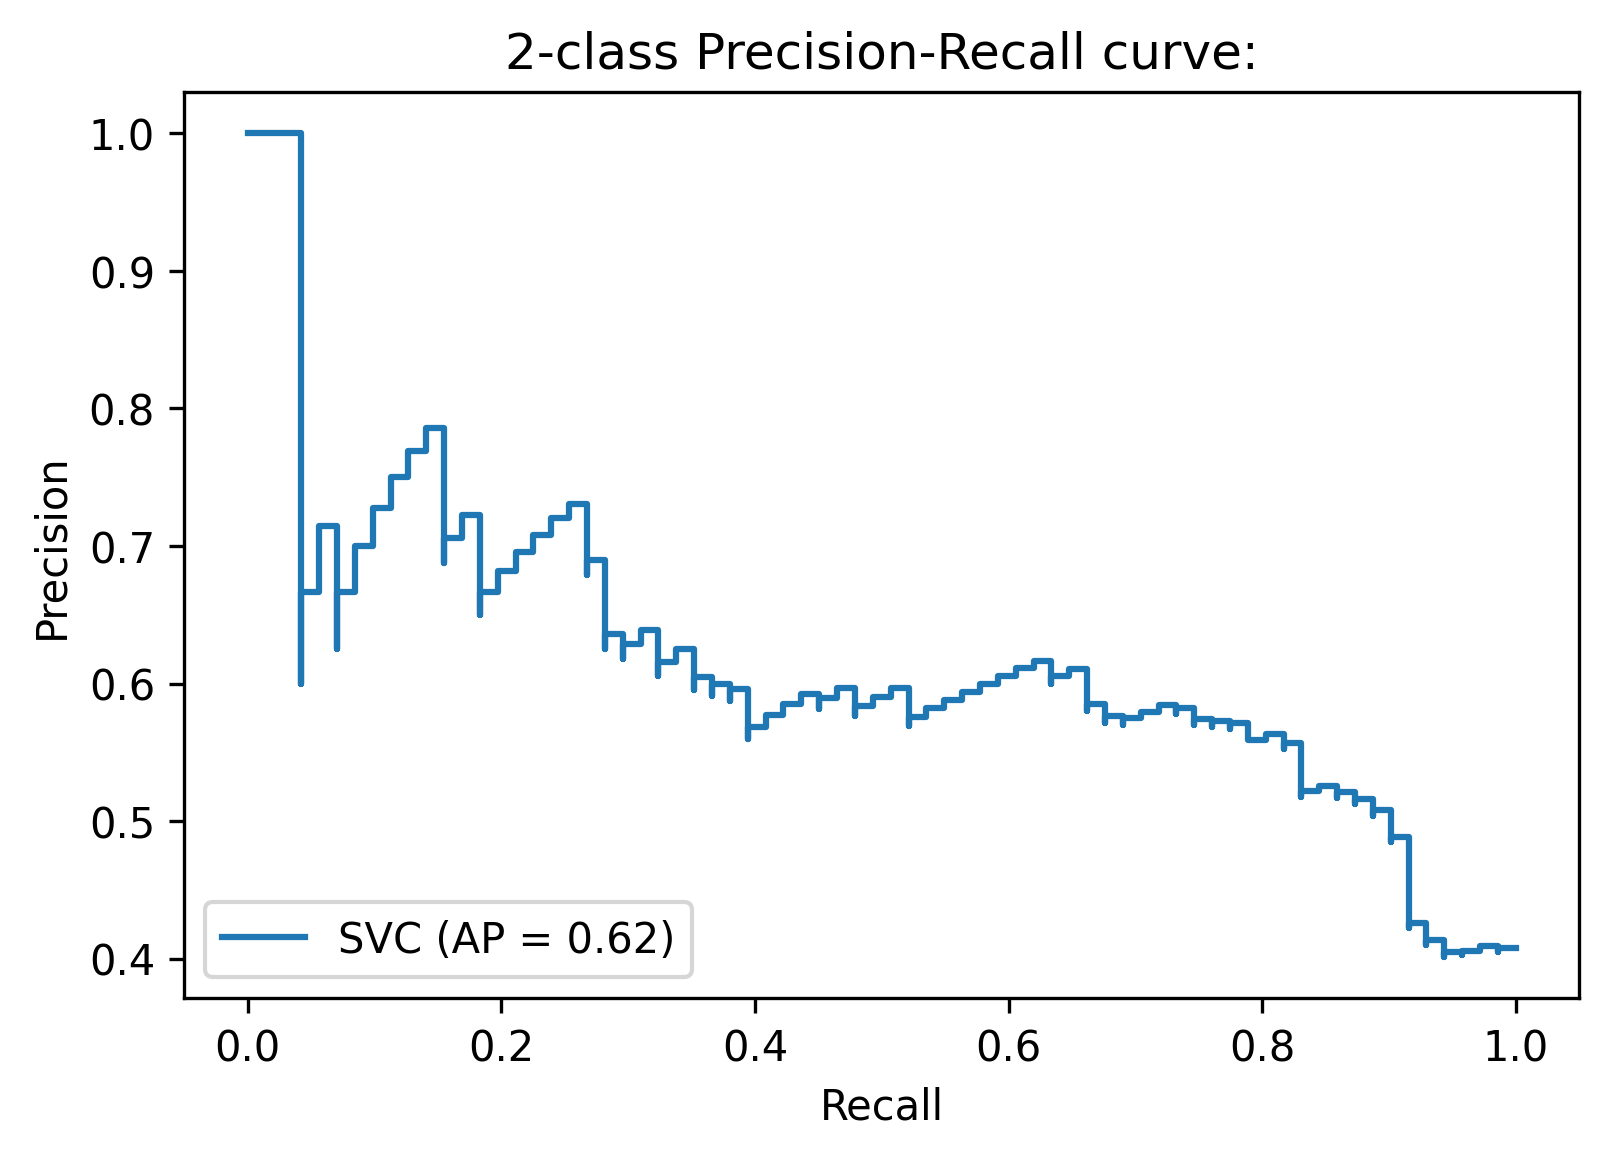

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svc,X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve:')

#Cross Validation com SVM

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

cv_mean = cross_val_score(svc, X, y, cv=5,scoring='f1_macro') 
print(cv_mean)
np.mean(cv_mean)


[0.45354474 0.71476064 0.59547383 0.63418605 0.62279643]


0.604152337617563

#Stratificado com k-fold do SVM

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)

for train_index, test_index in skf.split(X, y):
     X_train_strat, X_test_strat = X[train_index], X[test_index]
     y_train_strat, y_test_strat = y[train_index], y[test_index]

svc = SVC()
svc.fit(X_train_strat, y_train_strat)



from sklearn.metrics import accuracy_score

y_train_true_strat_svm = y_train_strat
y_train_pred_strat_svm = svc.predict(X_train_strat)
y_test_true_strat_svm = y_test_strat
y_test_pred_strat_svm = svc.predict(X_test_strat)

 
acc_svc = round(accuracy_score(y_test_true_strat_svm, y_test_pred_strat_svm) * 100, 2)
print(acc_svc)

 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
69.01


#F1 do SVM estratificado

In [ ]:
f1_score( y_test_true_strat_svm,  y_test_pred_strat_svm )

0.4634146341463415

#Precision x Recall

Text(0.5, 1.0, '2-class Precision-Recall curve:')

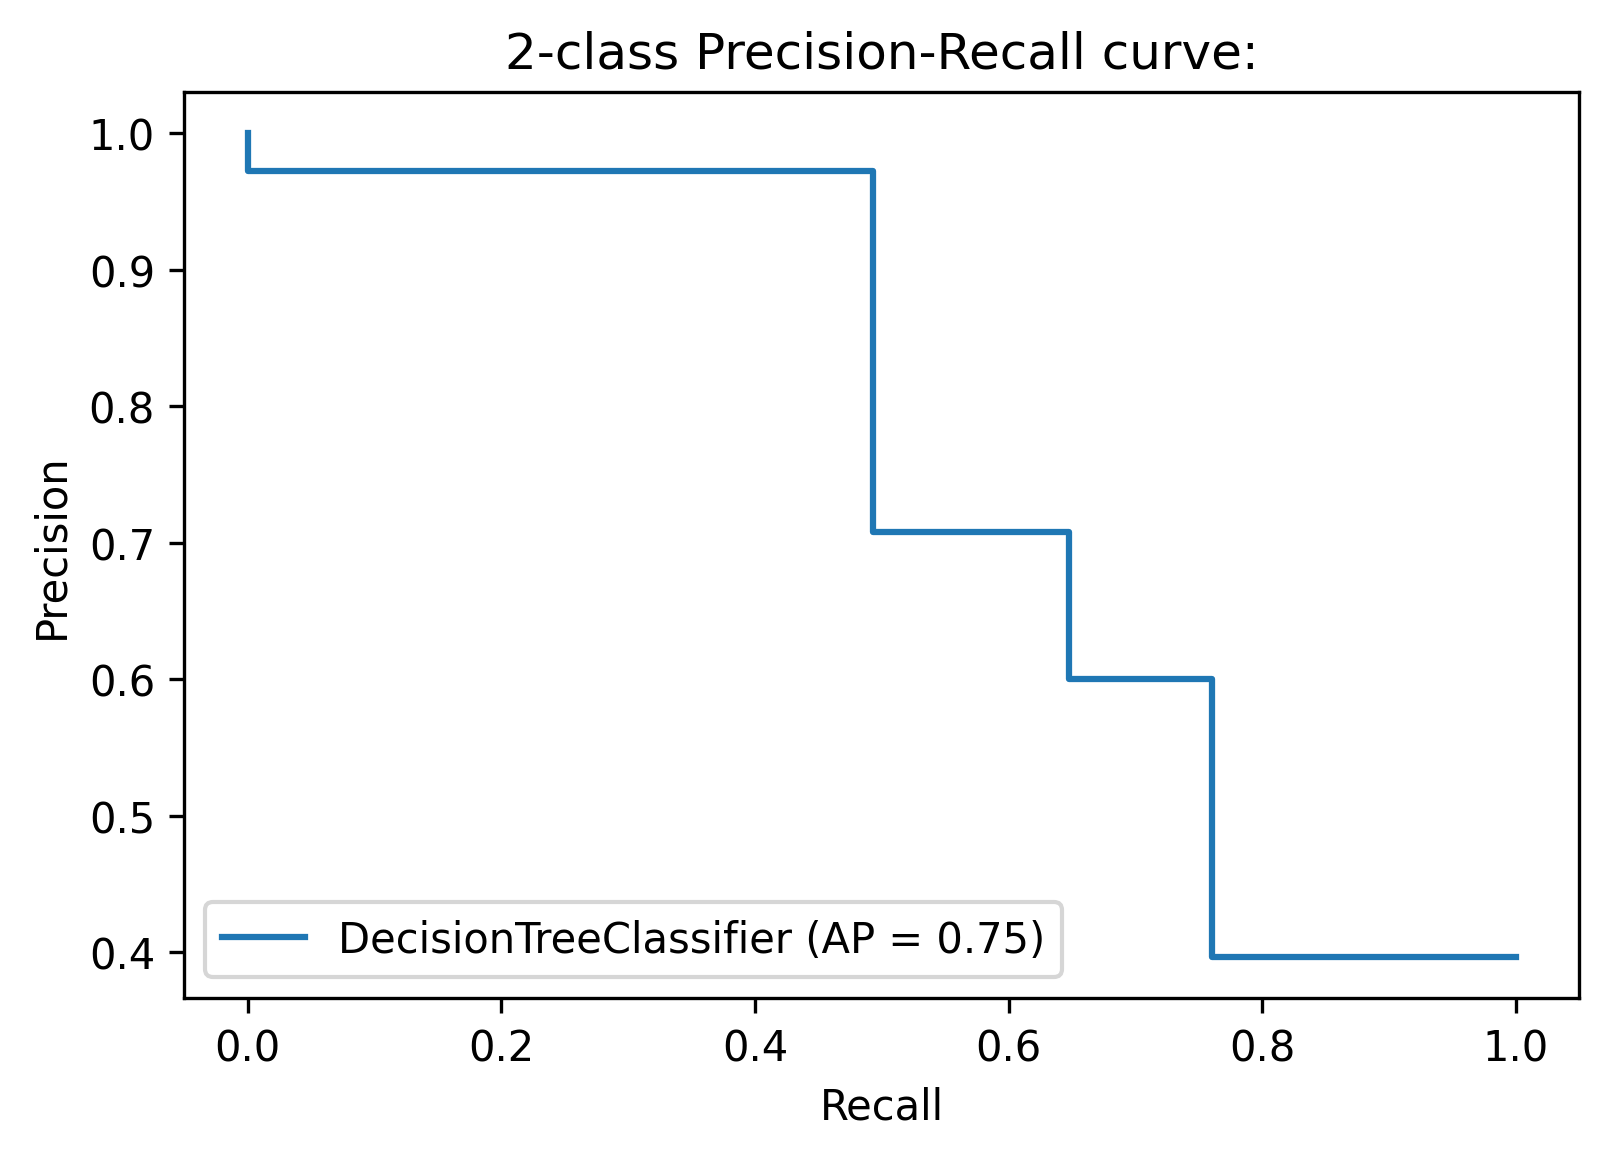

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf,X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve:')